In [2]:
# Import python libs
import pandas as pd
import matplotlib.pyplot  as plt

In [3]:
# read csv with pandas
df = pd.read_csv('data\\kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


###### Principal estratégia: Comprar boas casas em ótimas localizações com preços baixos e depois revendê-las posteriormente à preços mais altos.
###### Quanto maior a diferença entre a compra e a venda, maior o lucro da empresa e portanto maior sua receita. Entretanto, as casas possuem muitos 
###### atributos que as tornam mais ou menos atrativas aos compradores e vendedores e a localização e o período do ano também podem influenciar os preços.

In [4]:
# Primeiramente, comprar boas casas em ótimas localizações com preços baixos e depois revendê-las posteriormente à preços mais altos.
# Parametrizar as localizações pela mediana do valor, assumindo assim as áreas nobres/mais valorizadas.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# Assim, vou usar a coluna zip-code, assumindo que ela seja responsável pela localização, então vou agrupar elas e verificar a media de preço
df_location_price = pd.DataFrame()
df_location_price['average_prices_by_zipcode_ordered'] = df.groupby('zipcode')['price'].mean().sort_values(ascending=False)

df_location_price['median_prices_by_zipcode_ordered'] = df.groupby('zipcode')['price'].median().sort_values(ascending=False)
df_location_price.head()

# print("number of locations in the dataset -> ",len(df_location_price)) 


,average_prices_by_zipcode_ordered,median_prices_by_zipcode_ordered
zipcode,,
98039,2.160607e+06,1892500.0
98004,1.355927e+06,1150000.0
98040,1.194230e+06,993750.0
98112,1.095499e+06,915000.0
98102,9.012583e+05,720000.0


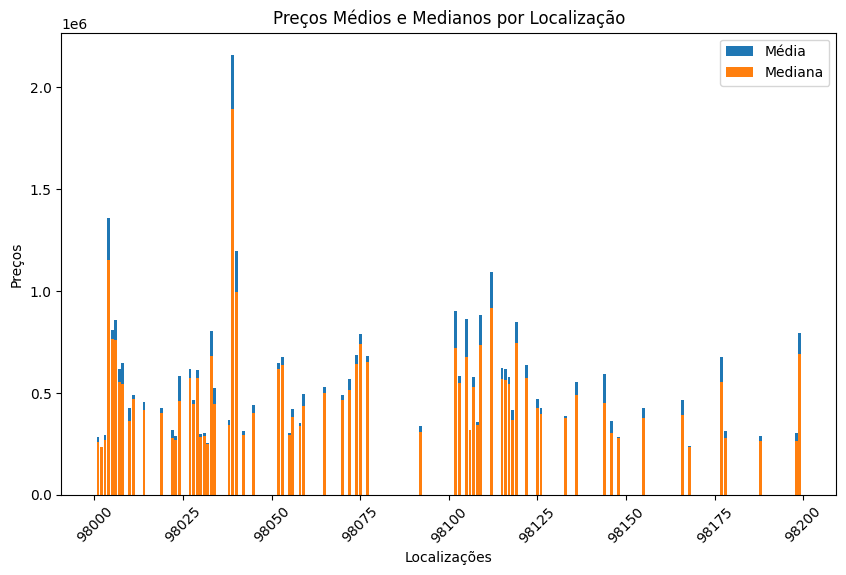

In [6]:
# Resetar o índice para que 'zipcode' seja uma coluna novamente
df_location_price.reset_index(inplace=True)

# Criar um gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Adicionar barras para a média
ax.bar(df_location_price['zipcode'], df_location_price['average_prices_by_zipcode_ordered'], label='Média')

# Adicionar barras para a mediana
ax.bar(df_location_price['zipcode'], df_location_price['median_prices_by_zipcode_ordered'], label='Mediana')

# Adicionar rótulos e título
ax.set_xlabel('Localizações')
ax.set_ylabel('Preços')
ax.set_title('Preços Médios e Medianos por Localização')
ax.legend()

# Rotacionar os rótulos no eixo x para melhor visualização
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.show()

In [13]:
# Entender as colunas conditions
df['grade'].head()

0    7
1    7
2    6
3    7
4    8
Name: grade, dtype: int64

In [17]:
# Selecione apenas as colunas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calcule a matriz de correlação para as colunas numéricas
correlation_matrix = numeric_columns.corr()

# Ordene as correlações com o preço em ordem decrescente
price_correlations = correlation_matrix['price'].sort_values(ascending=False)

# Imprima as correlações
print("Correlações com o preço:")
print(price_correlations)

Correlações com o preço:
price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


In [18]:
#Positivamente correlacionadas com o preço:

# sqft_living (Área de estar): Correlação positiva forte.
# grade: Correlação positiva forte.
# sqft_above (Área acima do solo): Correlação positiva moderada.
# sqft_living15: Correlação positiva moderada.
# bathrooms: Correlação positiva moderada.
# view: Correlação positiva moderada.
# sqft_basement (Área do porão): Correlação positiva moderada.
# bedrooms: Correlação positiva moderada.
# Negativamente correlacionadas com o preço:

# zipcode: Correlação negativa leve.
# id: Correlação negativa leve.
# long: Correlação negativa leve.
# condition: Correlação negativa leve.
# yr_built: Correlação negativa leve.

# Com isso, levo em conta na relação de item estrutural e preço, as colunas com correção moderada acima de 50%, sendo elas:
# sqft_living      0.702035
# grade            0.667434
# sqft_above       0.605567
# sqft_living15    0.585379
# bathrooms        0.525138


# verificar a estrutuda das casas mais caras, objetivando encontrar configurações que aumentem o preço do imóvel

data_sorted = df.sort_values(by='price', ascending=False)

# Obtenha as características da casa mais valorizada
most_valuable_house = data_sorted.iloc[0]

# Imprima as características
print("Características da casa mais valorizada:")
print("ID:", most_valuable_house['id'])
print("Preço:", most_valuable_house['price'])
print("Área de estar (sqft):", most_valuable_house['sqft_living'])
print("Área de estar (sqft) em 15 M2:", most_valuable_house['sqft_living15'])
print("Área superior:", most_valuable_house['sqft_above'])
print("Nota:", most_valuable_house['grade'])
print("Banheiros:", most_valuable_house['bathrooms'])

# Se quiser obter o número total de cada característica para as casas mais valorizadas
num_bathrooms = data_sorted['bathrooms'].head(10).value_counts()
num_sqft_living = data_sorted['sqft_living'].head(10).value_counts()
num_sqft_living15 = data_sorted['sqft_living15'].head(10).value_counts()
num_grade = data_sorted['grade'].head(10).value_counts()
num_sqft_above = data_sorted['sqft_above'].head(10).value_counts()


print("\nNúmero de banheiros para as 10 casas mais valorizadas:")
print(num_bathrooms)

print("\nNúmero de casas por área de estar para as 10 casas mais valorizadas:")
print(num_sqft_living)


print("\nNota das 10 casas mais valorizadas:")
print(num_grade)

print("Área superior das 10 casas mais valorizadas:")
print(num_sqft_above)

Características da casa mais valorizada:
ID: 6762700020
Preço: 7700000.0
Área de estar (sqft): 12050
Área de estar (sqft) em 15 M2: 3940
Área superior: 8570
Nota: 13
Banheiros: 8.0

Número de banheiros para as 10 casas mais valorizadas:
bathrooms
8.00    1
4.50    1
7.75    1
5.75    1
5.00    1
6.00    1
5.25    1
6.75    1
5.50    1
3.00    1
Name: count, dtype: int64

Número de casas por área de estar para as 10 casas mais valorizadas:
sqft_living
12050    1
10040    1
9890     1
9200     1
8000     1
7390     1
8010     1
9640     1
6640     1
6430     1
Name: count, dtype: int64

Nota das 10 casas mais valorizadas:
grade
12    6
13    3
11    1
Name: count, dtype: int64
Área superior das 10 casas mais valorizadas:
sqft_above
8570    1
7680    1
8860    1
6200    1
6720    1
5000    1
5990    1
4820    1
6350    1
6430    1
Name: count, dtype: int64


In [20]:
# tendo em vista os itens que influênciam no preço vamos usar suas médias e medianas na buscar por casas valiosas para comprar, 
# que tenham ótimas localizações com preços baixos e depois revendê-las posteriormente à preços mais altos.

# Calcular a média e a mediana
mean_sqft_living = data_sorted['sqft_living'].mean()
median_sqft_living = data_sorted['sqft_living'].median()

mean_sqft_living15 = data_sorted['sqft_living15'].mean()
median_sqft_living15 = data_sorted['sqft_living15'].median()

mean_sqft_above = data_sorted['sqft_above'].mean()
median_sqft_above = data_sorted['sqft_above'].median()

mean_grade = data_sorted['grade'].mean()
median_grade = data_sorted['grade'].median()

mean_bathrooms = data_sorted['bathrooms'].mean()
median_bathrooms = data_sorted['bathrooms'].median()

# Imprimir os resultados
print("Média de Área de estar (sqft):", mean_sqft_living)
print("Mediana de Área de estar (sqft):", median_sqft_living)

print("\nMédia de Área de estar (sqft) em 15 M2:", mean_sqft_living15)
print("Mediana de Área de estar (sqft) em 15 M2:", median_sqft_living15)

print("\nMédia de Área superior:", mean_sqft_above)
print("Mediana de Área superior:", median_sqft_above)

print("\nMédia de Nota:", mean_grade)
print("Mediana de Nota:", median_grade)

print("\nMédia de Banheiros:", mean_bathrooms)
print("Mediana de Banheiros:", median_bathrooms)


Média de Área de estar (sqft): 2079.8997362698374
Mediana de Área de estar (sqft): 1910.0

Média de Área de estar (sqft) em 15 M2: 1986.552491556008
Mediana de Área de estar (sqft) em 15 M2: 1840.0

Média de Área superior: 1788.3906907879516
Mediana de Área superior: 1560.0

Média de Nota: 7.656873178179799
Mediana de Nota: 7.0

Média de Banheiros: 2.1147573219821405
Mediana de Banheiros: 2.25


In [24]:
# Vamos iniciar a exploração das casas, priorizando os lugares mais valorizados com menor preço, em seguida analisando os itens estruturais que podem valorizar a casa na questão da venda.

# Me trás os 5 locais mais valorizados dos 70
print(len(df_location_price))
df_location_price.head()

70


,zipcode,average_prices_by_zipcode_ordered,median_prices_by_zipcode_ordered
0,98039,2.160607e+06,1892500.0
1,98004,1.355927e+06,1150000.0
2,98040,1.194230e+06,993750.0
3,98112,1.095499e+06,915000.0
4,98102,9.012583e+05,720000.0


In [29]:
df_most_valued_location = df[df['zipcode'].isin([98039, 98004, 98040, 98112, 98102])]
print("Total de casas do dataset ", len(df)) 
print("Casas em locais valorizados ", len(df_most_valued_location)) 


Total de casas do dataset  21613
Casas em locais valorizados  1023


In [48]:
# Classificando o DataFrame df_most_valued_location pelos preços
df_most_valued_location_sorted = df_most_valued_location.sort_values(by='price')

# Resetando os índices do DataFrame df
df = df.reset_index(drop=True)

# Filtrando casas com preços abaixo da mediana do DataFrame df
filtered_houses = df_most_valued_location_sorted[df['price'] < df['price'].median()]

# Classificando as casas filtradas por várias colunas em ordem decrescente
filtered_houses_sorted = filtered_houses.sort_values(
    by=['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms'],
    ascending=[False, False, False, False, False]
)

# Imprimindo o número de casas filtradas e classificadas
print(f"Número de casas filtradas: {len(filtered_houses_sorted)}")


Número de casas filtradas: 18


C:\Users\lucas.araujo\AppData\Local\Temp\ipykernel_17192\16383208.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_houses = df_most_valued_location_sorted[df['price'] < df['price'].median()]


# Conclusão

In [50]:
# comprar boas casas em ótimas localizações com preços baixos e depois revendê-las posteriormente à preços mais altos.

# Exibindo as casas filtradas e classificadas como valiosas com preço abaixo da mediana:
filtered_houses_sorted


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9417,9828701565,20150209T000000,375000.0,3,2.00,2240,5200,1.0,0,0,...,7,1630,610,1954,0,98112,47.6191,-122.296,1470,3775
16942,5015001680,20140611T000000,427000.0,4,1.00,1860,4736,1.5,0,0,...,7,1860,0,1901,0,98112,47.6251,-122.300,1800,4000
17538,2425700022,20140929T000000,425000.0,4,1.75,1730,11890,1.0,0,0,...,7,980,750,1955,0,98004,47.5979,-122.194,2100,12325
3120,9209900315,20140811T000000,350000.0,3,1.50,1320,4400,1.0,0,0,...,6,1320,0,1909,0,98112,47.6231,-122.292,1350,4400
3410,9390700100,20140910T000000,390000.0,2,1.75,1150,2723,1.0,0,0,...,7,770,380,1923,0,98102,47.6357,-122.322,1440,4000
8656,2902200838,20141027T000000,440000.0,2,2.75,1100,1088,2.0,0,0,...,7,750,350,2006,0,98102,47.6405,-122.324,2090,4125
8265,2163900028,20150128T000000,350000.0,2,1.00,1070,2880,1.0,0,0,...,7,1070,0,1902,0,98102,47.6261,-122.324,2030,2880
17388,952006728,20140613T000000,330000.0,3,2.50,1070,1155,2.0,0,0,...,7,720,350,2005,0,98102,47.5617,-122.385,1120,2594
17821,1338600090,20140923T000000,370000.0,2,1.00,1040,4172,1.0,0,0,...,7,1040,0,1946,0,98112,47.6308,-122.302,3120,4800
962,6852700478,20140916T000000,425000.0,2,1.00,970,2970,1.0,0,0,...,7,970,0,1910,0,98102,47.6233,-122.319,1670,3000
